# 🎓 Udemy Courses Data Analysis (EDA)

## Dataset Overview
This dataset contains information about online courses available on Udemy,
including course title, subject, level, price, number of reviews, and whether
the course is paid or free.

## Objective
The objective of this analysis is to:
- Understand the distribution of courses across subjects and levels
- Analyze pricing and review patterns
- Identify factors influencing course popularity
--------------------------------------------------------------------------------------------------------------------------------

### Importing libraries 

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import matplotlib.style as style
import seaborn as sns 
style.use('ggplot')
plt.style.use('seaborn-v0_8')

### Load Udemy Dataset 

In [2]:
df=pd.read_csv('udemy_courses.csv')
df.head(5)

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5,2017-01-18T20:58:58Z,Business Finance
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All Levels,39.0,2017-03-09T16:34:20Z,Business Finance
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,True,45,2174,74,51,Intermediate Level,2.5,2016-12-19T19:26:30Z,Business Finance
3,1210588,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,True,95,2451,11,36,All Levels,3.0,2017-05-30T20:07:24Z,Business Finance
4,1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,True,200,1276,45,26,Intermediate Level,2.0,2016-12-13T14:57:18Z,Business Finance


### Dataset shape (Rows and Columns)

In [3]:
print("Number of Rows   ::",df.shape[0])
print("Number of Columns::",df.shape[1])

Number of Rows   :: 3678
Number of Columns:: 12


Shows the total number of records (rows) and features (columns) in the dataset, helping assess the dataset size before analysis.

### Display Information about Datset .

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3678 entries, 0 to 3677
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   course_id            3678 non-null   int64  
 1   course_title         3678 non-null   object 
 2   url                  3678 non-null   object 
 3   is_paid              3678 non-null   bool   
 4   price                3678 non-null   int64  
 5   num_subscribers      3678 non-null   int64  
 6   num_reviews          3678 non-null   int64  
 7   num_lectures         3678 non-null   int64  
 8   level                3678 non-null   object 
 9   content_duration     3678 non-null   float64
 10  published_timestamp  3678 non-null   object 
 11  subject              3678 non-null   object 
dtypes: bool(1), float64(1), int64(5), object(5)
memory usage: 319.8+ KB


Provides details about column names, data types, and non-null counts to verify data structure and data quality before analysis.

### Get overall statistics about the dataset.

In [5]:
df.describe()

,course_id,price,num_subscribers,num_reviews,num_lectures,content_duration
count,3.678000e+03,3678.000000,3678.000000,3678.000000,3678.000000,3678.000000
mean,6.759720e+05,66.049483,3197.150625,156.259108,40.108755,4.094517
std,3.432732e+05,61.005755,9504.117010,935.452044,50.383346,6.053840
min,8.324000e+03,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.076925e+05,20.000000,111.000000,4.000000,15.000000,1.000000
50%,6.879170e+05,45.000000,911.500000,18.000000,25.000000,2.000000
75%,9.613555e+05,95.000000,2546.000000,67.000000,45.750000,4.500000
max,1.282064e+06,200.000000,268923.000000,27445.000000,779.000000,78.500000


### Checking Null Values in Datset 

In [6]:
df.isnull().sum()

course_id              0
course_title           0
url                    0
is_paid                0
price                  0
num_subscribers        0
num_reviews            0
num_lectures           0
level                  0
content_duration       0
published_timestamp    0
subject                0
dtype: int64

Identifies the number of missing values in each column, helping determine which features require data cleaning before further analysis.

### Check and Remove Duplicate Records

In [7]:
df.duplicated().sum()

6

In [8]:
df.drop_duplicates()

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5,2017-01-18T20:58:58Z,Business Finance
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All Levels,39.0,2017-03-09T16:34:20Z,Business Finance
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,True,45,2174,74,51,Intermediate Level,2.5,2016-12-19T19:26:30Z,Business Finance
3,1210588,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,True,95,2451,11,36,All Levels,3.0,2017-05-30T20:07:24Z,Business Finance
4,1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,True,200,1276,45,26,Intermediate Level,2.0,2016-12-13T14:57:18Z,Business Finance
...,...,...,...,...,...,...,...,...,...,...,...,...
3673,775618,Learn jQuery from Scratch - Master of JavaScri...,https://www.udemy.com/easy-jquery-for-beginner...,True,100,1040,14,21,All Levels,2.0,2016-06-14T17:36:46Z,Web Development
3674,1088178,How To Design A WordPress Website With No Codi...,https://www.udemy.com/how-to-make-a-wordpress-...,True,25,306,3,42,Beginner Level,3.5,2017-03-10T22:24:30Z,Web Development
3675,635248,Learn and Build using Polymer,https://www.udemy.com/learn-and-build-using-po...,True,40,513,169,48,All Levels,3.5,2015-12-30T16:41:42Z,Web Development
3676,905096,CSS Animations: Create Amazing Effects on Your...,https://www.udemy.com/css-animations-create-am...,True,50,300,31,38,All Levels,3.0,2016-08-11T19:06:15Z,Web Development


Identifies and removes duplicate records to ensure data integrity and avoid biased analysis results

### Number of Courses per Subject

In [9]:
df['subject'].value_counts()

subject
Web Development        1200
Business Finance       1195
Musical Instruments     680
Graphic Design          603
Name: count, dtype: int64

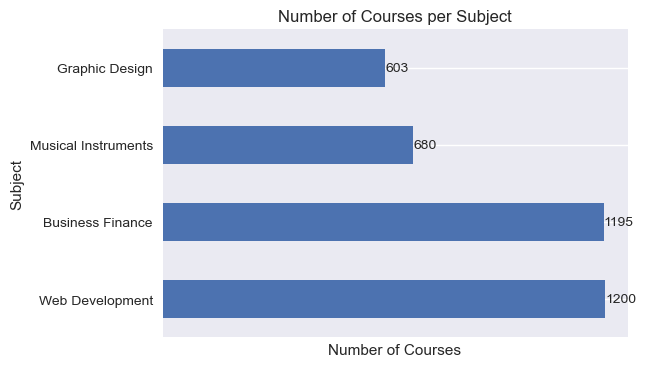

In [10]:
ax=df['subject'].value_counts().plot(kind='barh', figsize=(6,4))
ax.bar_label(ax.containers[0])
plt.title("Number of Courses per Subject")
plt.ylabel("Subject")
plt.xlabel("Number of Courses")
plt.xticks([])
plt.show()

### Course Levels Offered on Udemy

In [11]:
df['level'].value_counts()

level
All Levels            1929
Beginner Level        1270
Intermediate Level     421
Expert Level            58
Name: count, dtype: int64

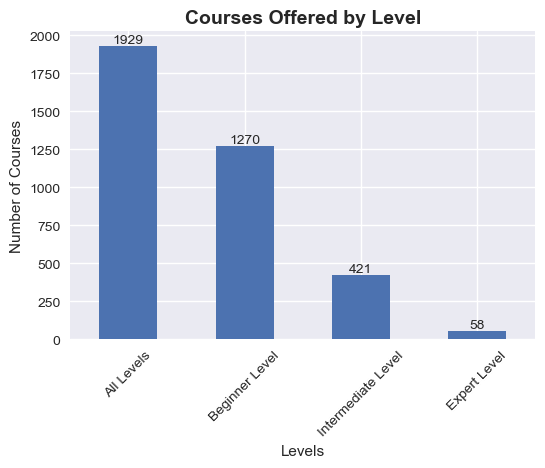

In [12]:
ax=df['level'].value_counts().plot(kind='bar', figsize=(6,4))
ax.bar_label(ax.containers[0])
plt.title("Courses Offered by Level", fontsize=14, fontweight='bold')
plt.ylabel("Number of Courses")
plt.xlabel("Levels")
plt.xticks(rotation=45)
plt.show()

Udemy offers courses across multiple levels, with a higher concentration
of beginner and intermediate courses compared to advanced levels.

### Number of Paid and Free Courses

In [13]:
df['is_paid'].value_counts()

is_paid
True     3368
False     310
Name: count, dtype: int64

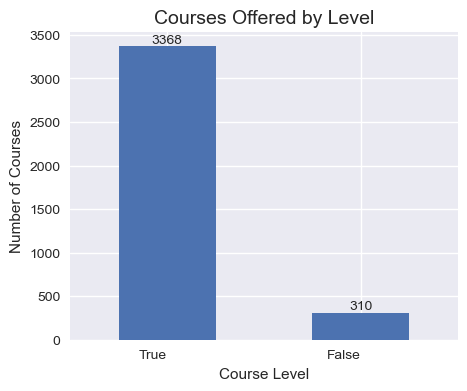

In [14]:
ax=df['is_paid'].value_counts().plot(kind='bar',figsize=(5,4))
ax.bar_label(ax.containers[0])
plt.title("Courses Offered by Level", fontsize=14)
plt.xlabel("Course Level")
plt.ylabel("Number of Courses")
plt.xticks(rotation=360, ha='right')
plt.show()

Udemy offers courses across multiple levels, with a higher concentration of beginner and 
intermediate courses compared to advanced levels.

### Courses with More Lectures: Free vs Paid

In [15]:
df.groupby('is_paid')['num_lectures'].mean()

is_paid
False    21.416129
True     41.829276
Name: num_lectures, dtype: float64

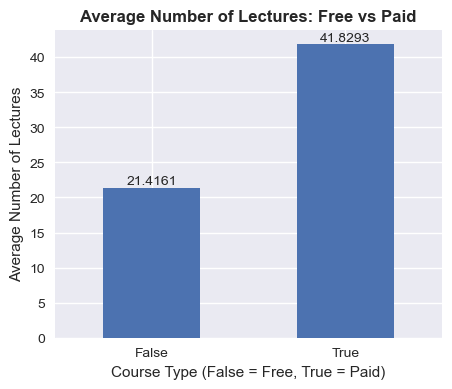

In [16]:
ax=df.groupby('is_paid')['num_lectures'].mean().plot(kind='bar',figsize=(5,4))
ax.bar_label(ax.containers[0])
plt.title("Average Number of Lectures: Free vs Paid",fontweight='bold')
plt.xlabel("Course Type (False = Free, True = Paid)")
plt.ylabel("Average Number of Lectures",)
plt.xticks(rotation=360)
plt.show()

paid courses typically have a higher average number of lectures than free courses, suggesting more comprehensive content.

### Courses with Higher Number of Subscribers: Free vs Paid

In [17]:
df.groupby('is_paid')['num_subscribers'].mean()

is_paid
False    11533.951613
True      2429.808492
Name: num_subscribers, dtype: float64

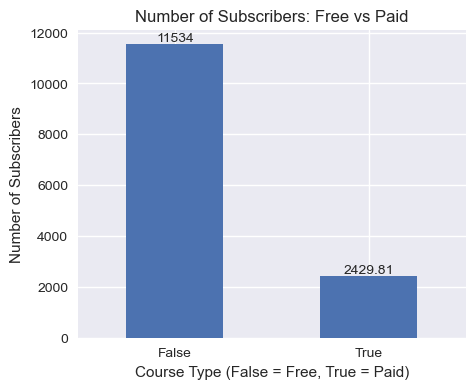

In [18]:
ax=df.groupby('is_paid')['num_subscribers'].mean().plot(kind='bar',figsize=(5,4))
ax.bar_label(ax.containers[0])
plt.xticks(rotation=360)
plt.title("Number of Subscribers: Free vs Paid")
plt.ylabel("Number of Subscribers")
plt.xlabel("Course Type (False = Free, True = Paid)")
plt.show()

The visualization clearly indicates whether free or paid courses tend to have higher subscriber counts on average.

### Level with Higher Number of Subscribers: Free vs Paid

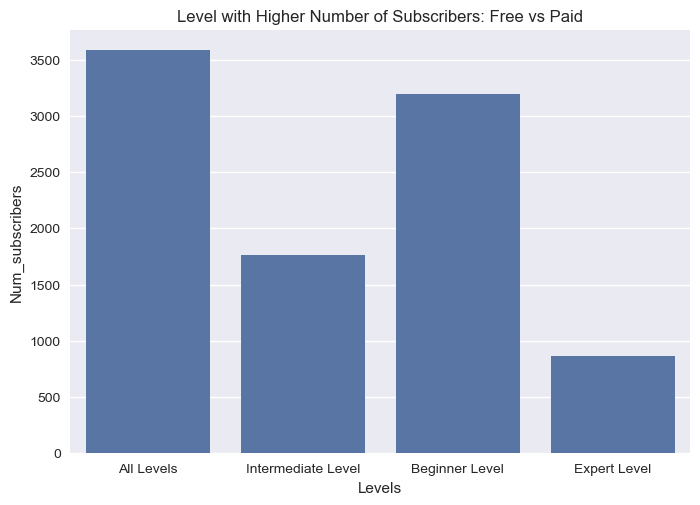

In [19]:
sns.barplot(x=df['level'],y=df['num_subscribers'],errorbar=None)
plt.title('Level with Higher Number of Subscribers: Free vs Paid')
plt.xlabel('Levels')
plt.ylabel('Num_subscribers')
plt.show()

### Most Popular Course (by Number of Subscribers)

In [20]:
# method 1
df.loc[df['num_subscribers'].idxmax()][['num_subscribers','course_title']]

num_subscribers                                  268923
course_title       Learn HTML5 Programming From Scratch
Name: 2827, dtype: object

In [21]:
# method 2
df[df['num_subscribers'].max()==df['num_subscribers']]['course_title']

2827    Learn HTML5 Programming From Scratch
Name: course_title, dtype: object

Identifies the single most popular course based on the highest subscriber count.

### Display 10 Most Popular Courses As Per Number of Subscribers

In [22]:
top_10=df.sort_values(by="num_subscribers",ascending=False).head(10)

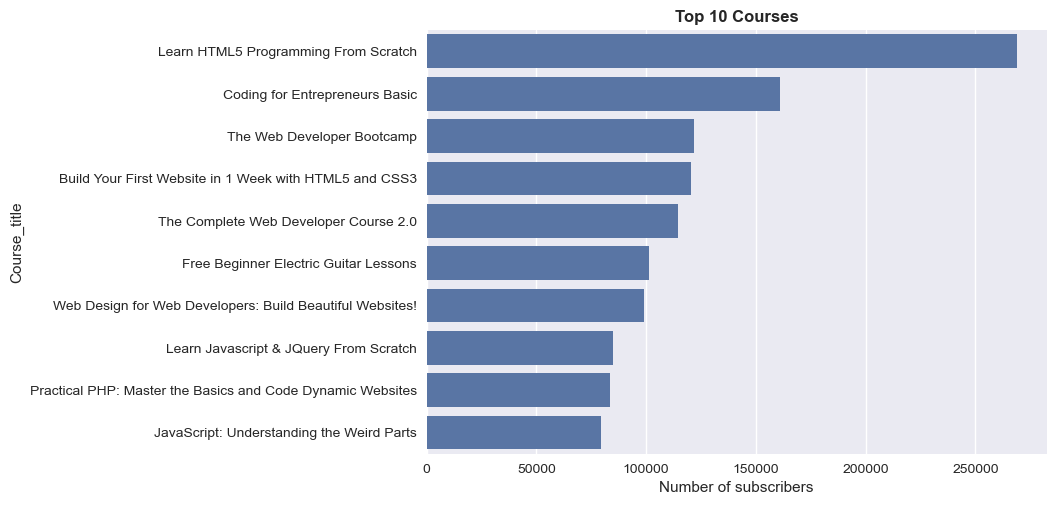

In [23]:
sns.barplot(x='num_subscribers',y='course_title',data=top_10)
plt.title('Top 10 Courses',fontweight='bold')
plt.xlabel('Number of subscribers')
plt.ylabel('Course_title')
plt.show()

Lists the ten courses with the highest subscriber counts, indicating the most popular courses on Udemy.

### Subject with Highest Number of Reviews

In [24]:
df.groupby('subject')['num_reviews'].mean()

subject
Business Finance        63.516318
Graphic Design          61.475954
Musical Instruments     46.652941
Web Development        358.354167
Name: num_reviews, dtype: float64

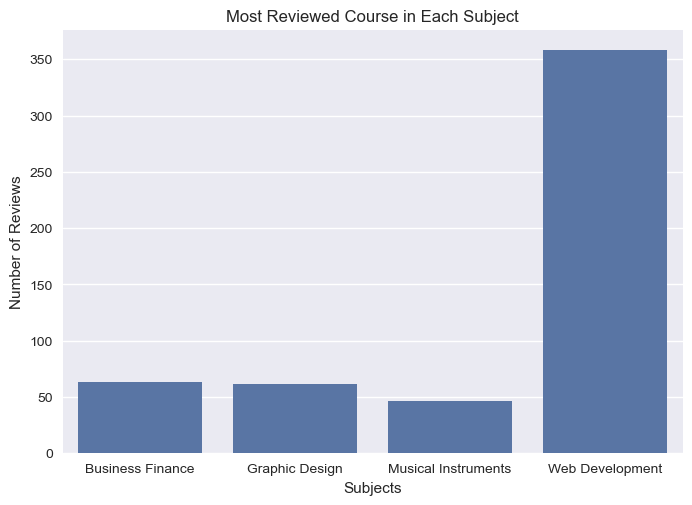

In [25]:
sns.barplot(x='subject',y='num_reviews',data=df,errorbar=None)
plt.title('Most Reviewed Course in Each Subject')
plt.xlabel('Subjects')
plt.ylabel('Number of Reviews')
plt.show()

In [26]:
df.columns

Index(['course_id', 'course_title', 'url', 'is_paid', 'price',
       'num_subscribers', 'num_reviews', 'num_lectures', 'level',
       'content_duration', 'published_timestamp', 'subject'],
      dtype='object')

### Do Reviews Affect the Price 

<Figure size 1500x600 with 0 Axes>

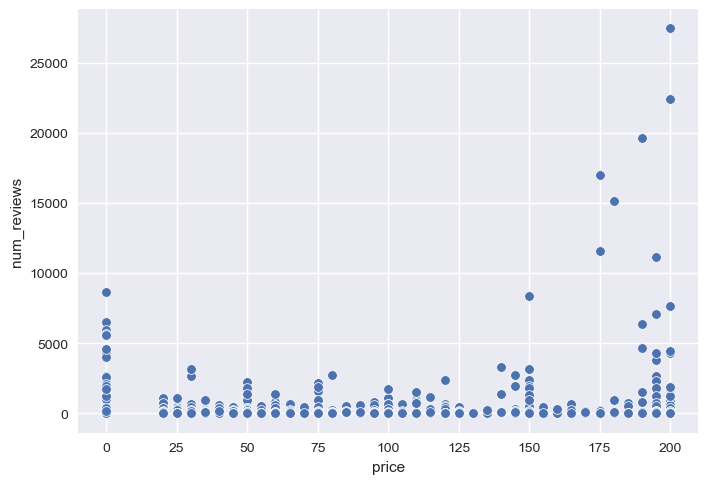

<Figure size 1500x600 with 0 Axes>

In [27]:
sns.scatterplot(x='price',y='num_reviews',data=df)
plt.figure(figsize=(15,6))

### Do Reviews Affect the Number of Subscribers?

In [28]:
df[['num_reviews', 'num_subscribers']].corr()

,num_reviews,num_subscribers
num_reviews,1.000000,0.649946
num_subscribers,0.649946,1.000000


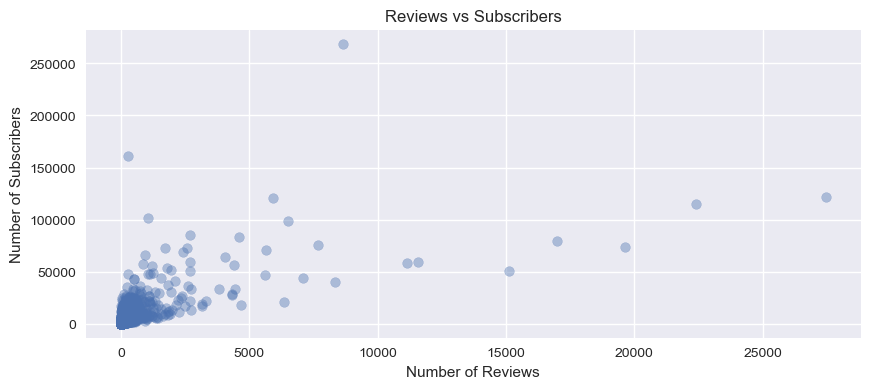

In [41]:
plt.figure(figsize=(10,4))
plt.scatter(df['num_reviews'], df['num_subscribers'], alpha=0.4)
plt.title("Reviews vs Subscribers")
plt.xlabel("Number of Reviews")
plt.ylabel("Number of Subscribers")
plt.show()

There is a positive relationship between the number of reviews and the number of subscribers.  
Courses with more reviews generally tend to attract more subscribers,
indicating higher visibility and trust.

### Courses Related To Python 

In [30]:
len(df[df['course_title'].str.contains('python',case=False)])

29

Counts how many courses are related to Python, indicating the popularity and demand for Python-based learning on Udemy.

In [31]:
python=df[df['course_title'].str.contains('python',case=False)].sort_values(by='num_subscribers',ascending=False).head(10)

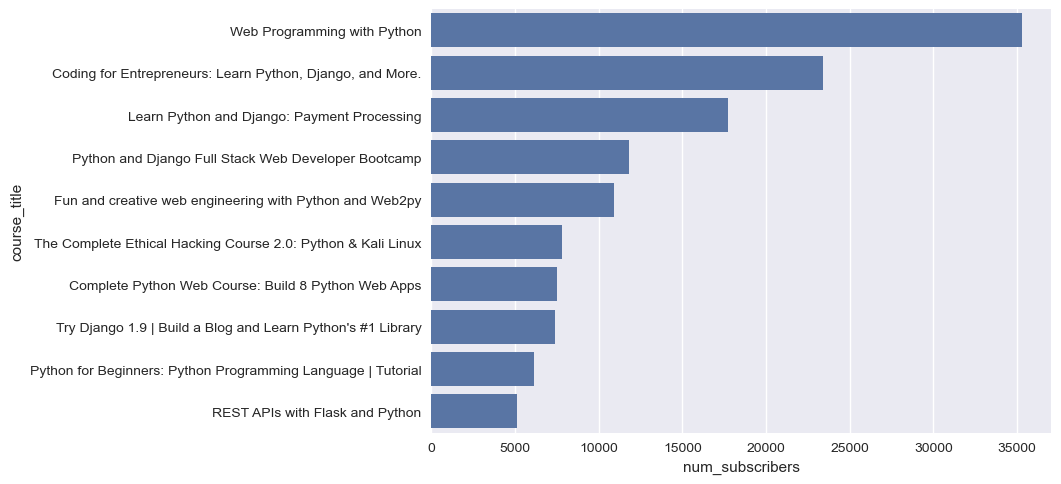

In [32]:
sns.barplot(x="num_subscribers",y="course_title",data=python)
plt.show()

Visually compares Python-related courses against all other courses on the platform.

## Conclusion 
- Udemy offers courses across multiple subjects and difficulty levels, with a higher concentration of beginner and intermediate courses.

- Paid courses are more common than free courses, indicating a strong monetization focus on the platform.

- Free courses generally attract a higher average number of subscribers, likely due to lower entry barriers.

- Paid courses tend to have more lectures, suggesting more structured and comprehensive content.

- Courses with a higher number of reviews usually have more subscribers, highlighting the importance of social proof.

- Python-related courses form a significant portion of the catalog, reflecting high demand for programming skills.

Overall, course popularity on Udemy is influenced by pricing, content volume, subject relevance, and learner feedback.